<a href="https://colab.research.google.com/github/GomezIker/master-IA-ejercicios/blob/main/Actividad2_aprendizaje_automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mobile_data = pd.read_csv('datasets_train.csv')
mobile_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
mobile_data.shape

(2000, 21)

In [ ]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
corr = mobile_data.corr(method = 'pearson')

[Text(0.5, 0, 'battery_power'),
 Text(1.5, 0, 'blue'),
 Text(2.5, 0, 'clock_speed'),
 Text(3.5, 0, 'dual_sim'),
 Text(4.5, 0, 'fc'),
 Text(5.5, 0, 'four_g'),
 Text(6.5, 0, 'int_memory'),
 Text(7.5, 0, 'm_dep'),
 Text(8.5, 0, 'mobile_wt'),
 Text(9.5, 0, 'n_cores'),
 Text(10.5, 0, 'pc'),
 Text(11.5, 0, 'px_height'),
 Text(12.5, 0, 'px_width'),
 Text(13.5, 0, 'ram'),
 Text(14.5, 0, 'sc_h'),
 Text(15.5, 0, 'sc_w'),
 Text(16.5, 0, 'talk_time'),
 Text(17.5, 0, 'three_g'),
 Text(18.5, 0, 'touch_screen'),
 Text(19.5, 0, 'wifi'),
 Text(20.5, 0, 'price_range')]

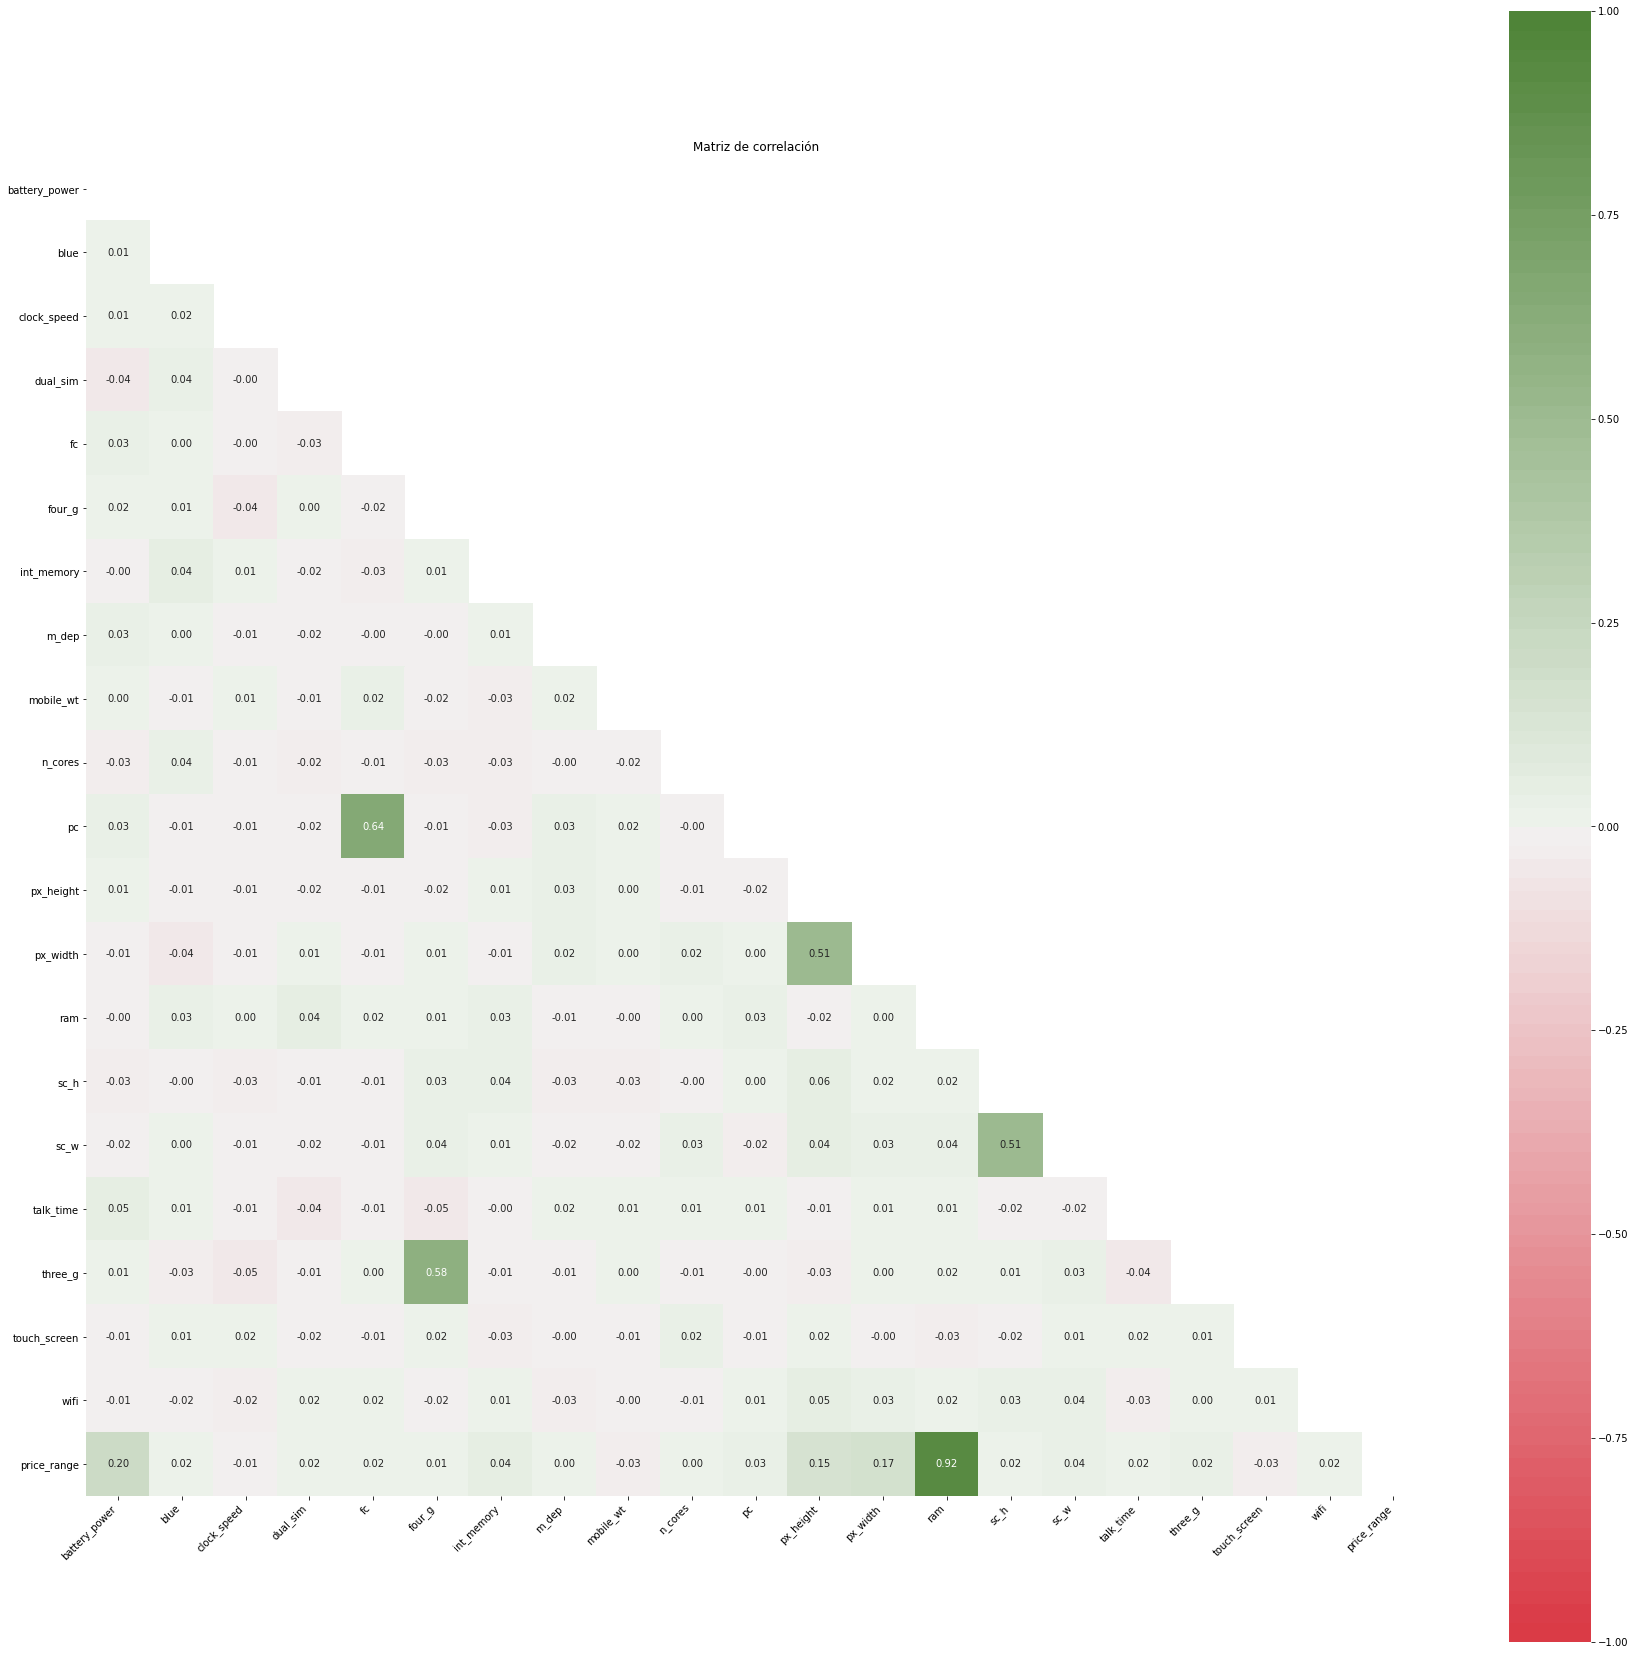

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (30,30))
plt.title("Matriz de correlación")

ax = sns.heatmap(corr,
                 vmin = -1,
                 vmax = 1,
                 center = 0,
                 cmap = sns.diverging_palette(10,120,n=100),
                 square = True,
                 annot = True,
                 fmt = ".2f",
                 mask=mask)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

In [ ]:
# Calculamos la covarianza entre ram y Price_range
# normalizamos los valores porque la varianza no se puede calcular con variables
# con diferentes unidades de medida
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(mobile_data.iloc[:,:].values)
mobile_norm = scaler.transform(mobile_data.iloc[:,:].values)
indexes = np.arange(0,2000)
columnas = mobile_data.columns
mobile_norm = pd.DataFrame(mobile_norm, index=indexes, columns=columnas)
cov = mobile_norm.cov()
cov.loc['ram','price_range']


0.9175044885092449

In [ ]:
pairs = corr.unstack()
sorted_pairs = pairs.sort_values()

negative_corr = sorted_pairs[sorted_pairs < -0.5]
# no hay ninguno con correlación negativa menor a -0.5

In [ ]:
indep_corr = sorted_pairs[sorted_pairs.between(-0.01,0.01)]
index = np.arange(0, len(indep_corr), 2)
print(indep_corr[index])

px_height    fc           -0.009990
wifi         n_cores      -0.009964
pc           blue         -0.009952
clock_speed  px_width     -0.009476
ram          m_dep        -0.009434
                             ...   
m_dep        int_memory    0.006886
int_memory   wifi          0.006993
ram          four_g        0.007313
four_g       px_width      0.007448
int_memory   four_g        0.008690
Length: 64, dtype: float64


In [ ]:
positive_corr = sorted_pairs[sorted_pairs.between(0.49,1,inclusive=False)]
index = np.arange(0, len(positive_corr), 2)
positive_corr[index]

sc_w      sc_h           0.506144
px_width  px_height      0.510664
four_g    three_g        0.584246
pc        fc             0.644595
ram       price_range    0.917046
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mobile_data.iloc[:,:-1],
                                                    mobile_data.price_range,
                                                    test_size = 0.3,
                                                    random_state = 2)


In [ ]:
from sklearn import svm

# Crea el clasificador con kernel linear
linear_svm = svm.SVC(kernel='linear')
#Entrena el modelo con los datos de entrenamient
linear_svm.fit(x_train, y_train)
#Predice las respuestas para el conjunto de test
y_pred = linear_svm.predict(x_test)


In [ ]:
# Comprobamos el accuracy del modelo entrenado
from sklearn import metrics

print("Accuracy: {:.5f}".format(metrics.accuracy_score(y_test, y_pred)))
print ("Error Máximo: {:.2f}".format(metrics.max_error(y_test, y_pred)))
print ("Mean Absolute Error (MAE): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print ("Mean Squared Error (MSE): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print ("Root Mean Squared Error (RMSE): {:.2f}".format( pow(metrics.mean_squared_error(y_test, y_pred) , 0.5)))
print ("Logaritmo de Mean Squared Error (RMSLE): {:.2f}".format(metrics.mean_squared_log_error(y_test, y_pred)))
print ("Median absolute Error (MAE): {:.2f}".format(metrics.median_absolute_error(y_test, y_pred)))
print ("Coeficiente de determinación R2: {:.2f}".format(metrics.r2_score(y_test, y_pred)))

Accuracy: 0.97667
Error Máximo: 1.00
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
Logaritmo de Mean Squared Error (RMSLE): 0.01
Median absolute Error (MAE): 0.00
Coeficiente de determinación R2: 0.98


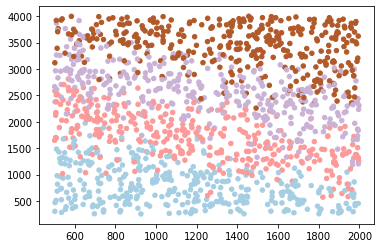

In [ ]:
plt.scatter(x_train.battery_power, x_train.ram, c=y_train, s=20, cmap=plt.cm.Paired)

In [ ]:
# Sin terminar, falta mostrar hiperplanos

In [ ]:
# Crea el clasificador con kernel radial
radial_svm = svm.SVC()
#Entrena el modelo con los datos de entrenamient
radial_svm.fit(x_train, y_train)
#Predice las respuestas para el conjunto de test
y_pred = radial_svm.predict(x_test)

In [ ]:
print("Radial - Accuracy: {:.5f}".format(metrics.accuracy_score(y_test, y_pred)))
print ("Radial - Error Máximo: {:.2f}".format(metrics.max_error(y_test, y_pred)))
print ("Radial - Mean Absolute Error (MAE): {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print ("Radial - Mean Squared Error (MSE): {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print ("Radial - Root Mean Squared Error (RMSE): {:.2f}".format( pow(metrics.mean_squared_error(y_test, y_pred) , 0.5)))
print ("Radial - Logaritmo de Mean Squared Error (RMSLE): {:.2f}".format(metrics.mean_squared_log_error(y_test, y_pred)))
print ("Radial - Median absolute Error (MAE): {:.2f}".format(metrics.median_absolute_error(y_test, y_pred)))
print ("Radial - Coeficiente de determinación R2: {:.2f}".format(metrics.r2_score(y_test, y_pred)))

Radial - Accuracy: 0.95000
Radial - Error Máximo: 1.00
Radial - Mean Absolute Error (MAE): 0.05
Radial - Mean Squared Error (MSE): 0.05
Radial - Root Mean Squared Error (RMSE): 0.22
Radial - Logaritmo de Mean Squared Error (RMSLE): 0.01
Radial - Median absolute Error (MAE): 0.00
Radial - Coeficiente de determinación R2: 0.96


In [ ]:
# red neuronal
# estandarizamos los valores de las variables
# fuente: https://www.datacamp.com/community/tutorials/deep-learning-python
# fuete : https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

X = mobile_data.iloc[:,:-1].values
Y = mobile_data.iloc[:,20:21].values

scaler = StandardScaler().fit(X)

x_train_sc = scaler.transform(X)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_enc = enc.fit_transform(Y).toarray()

In [ ]:
x_train_nn, x_test_nn, y_train_nn, y_test_nn = train_test_split(x_train_sc,
                                                    y_enc,
                                                    test_size = 0.3,
                                                    random_state = 2)

In [ ]:
# Dependencias
import keras
from keras.models import Sequential
from keras.layers import Dense

# Red neuronal
model = Sequential()
model.add(Dense(3, input_dim = 20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'mse'])

In [ ]:
trained_model = model.fit(x_train_nn,
                          y_train_nn,
                          epochs=100,
                          batch_size=64)

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 1.5604 - accuracy: 0.2259 - mse: 0.2548
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 1.5075 - accuracy: 0.2456 - mse: 0.2518
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 1.4770 - accuracy: 0.2333 - mse: 0.2500
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 1.4663 - accuracy: 0.2258 - mse: 0.2504
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4249 - accuracy: 0.2291 - mse: 0.2466
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 1.4284 - accuracy: 0.2407 - mse: 0.2481
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4181 - accuracy: 0.2401 - mse: 0.2475
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4095 - accuracy: 0.2502 - mse: 0.2471
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 1.4013 - accuracy: 0.27

In [ ]:
y_pred_nn = model.predict(x_test_nn)
# convertir las predicciones de nuevo a etiquetas 0,1,2 usando los indices del array
pred = list()
for i in range(len(y_pred_nn)):
  pred.append(np.argmax(y_pred_nn[i]))

# convertir de vuelta las etiquetas con OneHotEncoder a su etiqueta 0,1,2...
test = list()
for i in range(len(y_test_nn)):
  test.append(np.argmax(y_test_nn[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print("Accuracy score: ", a*100)

Accuracy score:  95.83333333333334


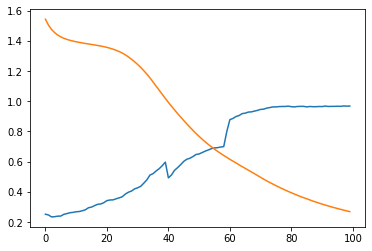

In [ ]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['loss'])